In [1]:
import pandas as pd
df=pd.read_excel('Dataset_w6.xlsx')
df

,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864.0,35530.0,623.2,125.0,3568.0
1,Albania,SouthernEurope,28748.0,2930.0,3984.2,134.0,4669.0
2,Algeria,NorthernAfrica,2381741.0,41318.0,4154.1,160.0,47091.0
3,Angola,MiddleAfrica,1246700.0,29784.0,4714.1,175.0,8790.0
4,Antigua and Barbuda,Caribbean,442.0,102.0,14764.5,88.0,491.0
...,...,...,...,...,...,...,...
191,Venezuela (Bolivarian Republic of),SouthAmerica,912050.0,31977.0,11068.9,118.0,16324.0
192,Viet Nam,South-easternAsia,330967.0,95541.0,2067.9,136.0,174111.0
193,Yemen,WesternAsia,527968.0,28250.0,1106.4,136.0,6861.0
194,Zambia,EasternAfrica,752612.0,17094.0,1311.1,179.0,7442.0


### 1. Find out how many countries are there in the dataset

In [2]:
len(pd.value_counts(df.country)) ## gives the total count of distinct values in country column

196

### 2. Examine the data by using visualizations

<AxesSubplot:title={'center':'Agricultural Production Index vs GDP per capita'}, xlabel='GDP per capita (current US$)', ylabel='Agricultural production index '>

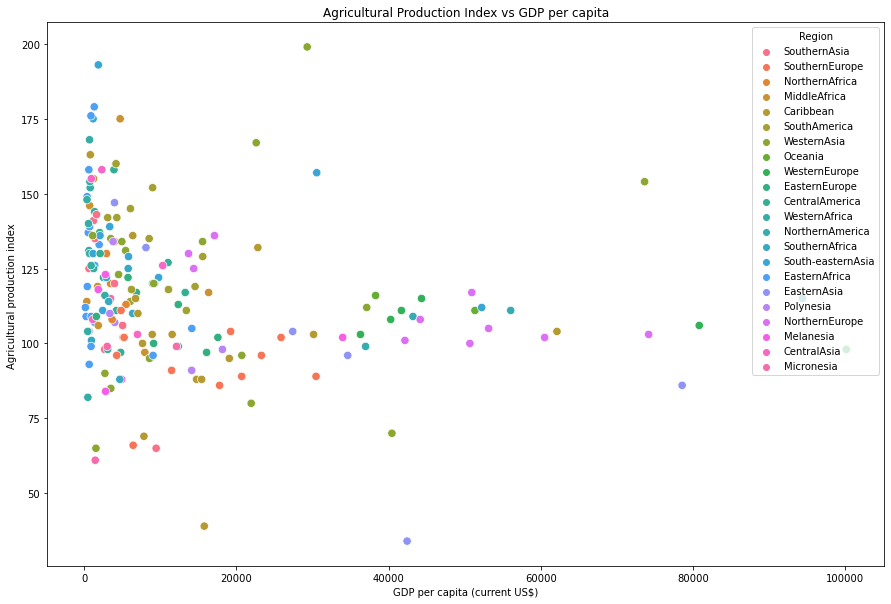

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.title("Agricultural Production Index vs GDP per capita")
# plots the relation between Agricultural Production Index and GDP per capita for all countries
sns.scatterplot(data=df,x="GDP per capita (current US$)", y="Agricultural production index ",hue='Region',s=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'EasternAsia'),
  Text(1, 0, 'South-easternAsia'),
  Text(2, 0, 'SouthernAsia'),
  Text(3, 0, 'NorthernAmerica'),
  Text(4, 0, 'WesternAsia'),
  Text(5, 0, 'Caribbean'),
  Text(6, 0, 'WesternEurope'),
  Text(7, 0, 'SouthernEurope'),
  Text(8, 0, 'EasternAfrica'),
  Text(9, 0, 'Micronesia'),
  Text(10, 0, 'Polynesia'),
  Text(11, 0, 'CentralAmerica'),
  Text(12, 0, 'WesternAfrica'),
  Text(13, 0, 'EasternEurope'),
  Text(14, 0, 'NorthernEurope'),
  Text(15, 0, 'NorthernAfrica'),
  Text(16, 0, 'MiddleAfrica'),
  Text(17, 0, 'SouthernAfrica'),
  Text(18, 0, 'CentralAsia'),
  Text(19, 0, 'Melanesia'),
  Text(20, 0, 'SouthAmerica'),
  Text(21, 0, 'Oceania')])

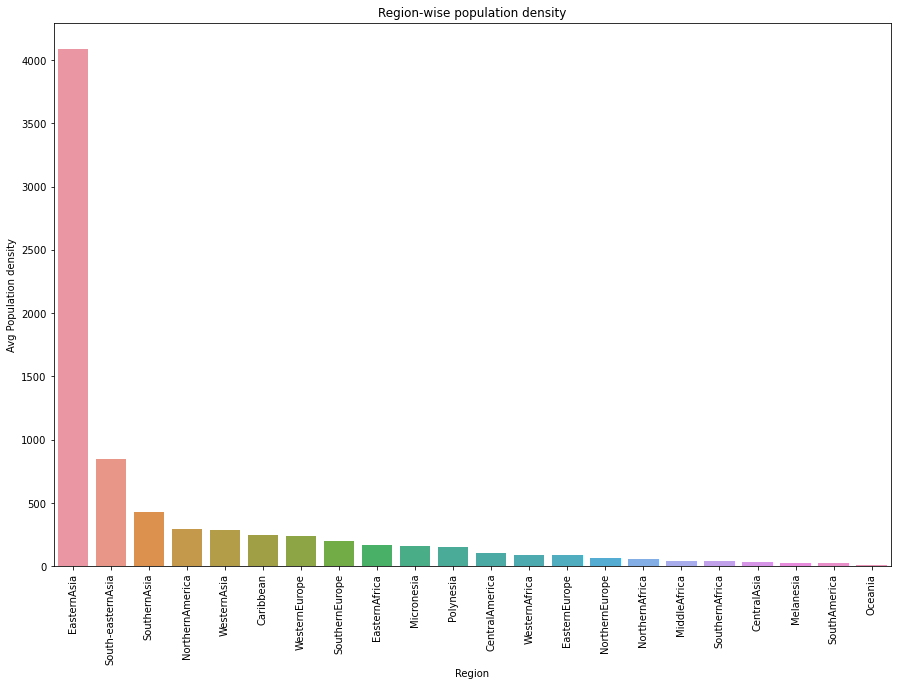

In [5]:
df['Population Density']=round((df['Population in thousands (2017)']*1000)/df['Surface area (km2)'],2) # adding new column population density
df1=df.groupby('Region')['Population Density'].mean().round(2).reset_index(name='Avg Population density') # average population density region-wise
plt.figure(figsize=(15,10))
plt.title('Region-wise population density')
# plots region-wise population density in descending order
sns.barplot(x='Region',
            y="Avg Population density", data=df1,
            order=df1.sort_values('Avg Population density',ascending = False).Region)
plt.xticks(rotation=90)

### 3. Find out how many countries with respect to the region are available in the dataset

In [6]:
df2=df.groupby('Region')['Region'].count().reset_index(name='Countries') # displays count of countries region-wise
df2

,Region,Countries
0,Caribbean,16
1,CentralAmerica,8
2,CentralAsia,5
3,EasternAfrica,17
4,EasternAsia,7
5,EasternEurope,10
6,Melanesia,5
7,Micronesia,4
8,MiddleAfrica,9
9,NorthernAfrica,5


### 4 a. On average which region has the highest a) GDP per capita b) International trade: Imports

In [10]:
df3=df.groupby('Region')[['GDP per capita (current US$)','International trade: Imports (million US$)']].mean().round(2).reset_index() ## gives mean of region-wise GDP and International trade
df3.rename(columns={'GDP per capita (current US$)':'Avg GDP', 'International trade: Imports (million US$)':'Avg Internation Trade Imports'}, inplace=True) ## renames columns
df3

,Region,Avg GDP,Avg Internation Trade Imports
0,Caribbean,15135.56,3057.31
1,CentralAmerica,6348.14,57031.50
2,CentralAsia,4329.88,12063.40
3,EasternAfrica,2088.85,4726.18
4,EasternAsia,27967.61,451995.00
5,EasternEurope,9292.49,85243.90
6,Melanesia,9261.96,2896.40
7,Micronesia,5008.30,99.00
8,MiddleAfrica,3928.83,4381.22
9,NorthernAfrica,3934.96,35034.40


[Text(0, 0, '57659'),
 Text(0, 0, '55387.1'),
 Text(0, 0, '44823.2'),
 Text(0, 0, '42098.2'),
 Text(0, 0, '27967.6')]

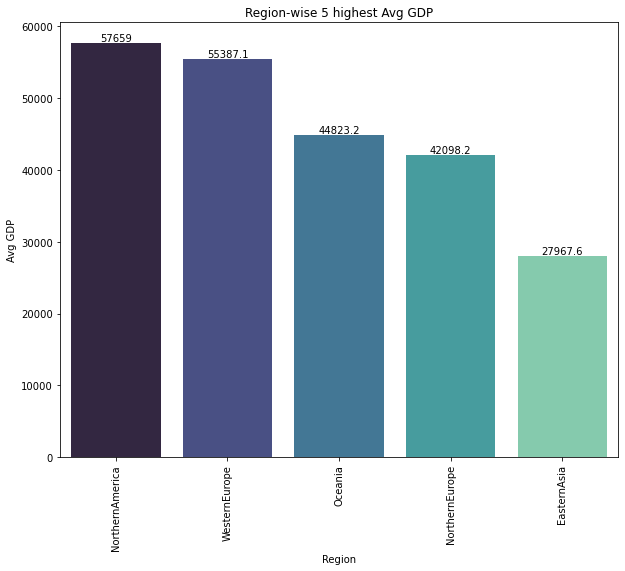

In [14]:
plt.figure(figsize=(10,8))
plt.title('Region-wise 5 highest Avg GDP')
ax=sns.barplot(x='Region',
            y="Avg GDP", data=df3, palette='mako',
            order=df3.sort_values('Avg GDP',ascending = False)[0:5].Region)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])

a) As per the above graph the region with the highest per capita GDP is Northern America

[Text(0, 0, '663552'),
 Text(0, 0, '451995'),
 Text(0, 0, '407498'),
 Text(0, 0, '113407'),
 Text(0, 0, '112914')]

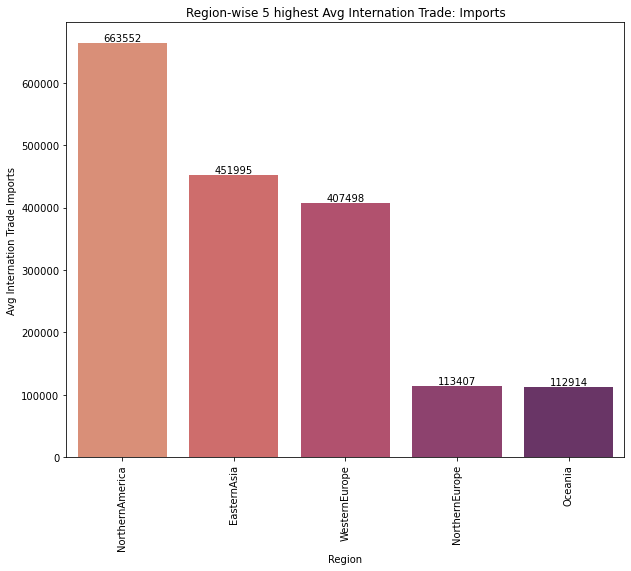

In [15]:
plt.figure(figsize=(10,8))
plt.title('Region-wise 5 highest Avg Internation Trade: Imports')
ax=sns.barplot(x='Region',
            y="Avg Internation Trade Imports", data=df3, palette='flare',
            order=df3.sort_values('Avg Internation Trade Imports',ascending = False)[0:5].Region)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])

b) As per the above graph the region with the highest Imports in International Trade is Northern America

### 5. Find out which region has more consistent with respect to GDP per capita

In [12]:
df10=df.groupby('Region')['GDP per capita (current US$)'].std().round(2).reset_index() # gives region-wise standard deviation of GDP per capita
df10.rename(columns={'GDP per capita (current US$)':'Std deviation GDP'}, inplace=True)
df10

,Region,Std deviation GDP
0,Caribbean,14579.37
1,CentralAmerica,4180.44
2,CentralAsia,4152.22
3,EasternAfrica,3716.13
4,EasternAsia,27485.12
5,EasternEurope,5415.49
6,Melanesia,13855.84
7,Micronesia,4820.67
8,MiddleAfrica,5274.85
9,NorthernAfrica,974.71


[Text(0, 0, '815.1'),
 Text(0, 0, '974.71'),
 Text(0, 0, '2177.55'),
 Text(0, 0, '2855.71'),
 Text(0, 0, '3716.13')]

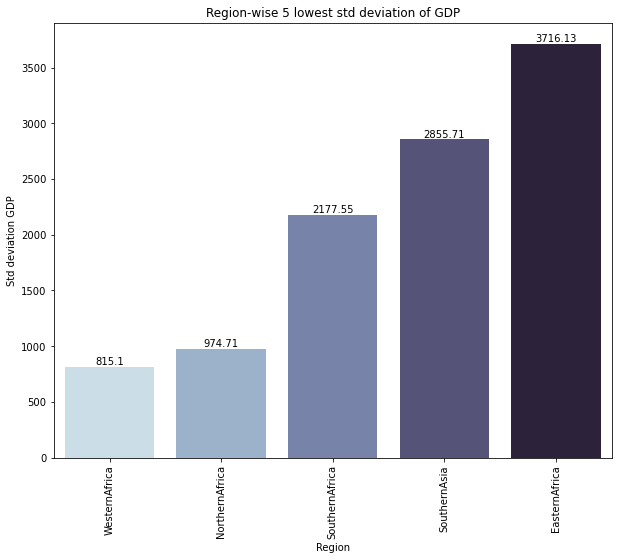

In [17]:
plt.figure(figsize=(10,8))
plt.title('Region-wise 5 lowest std deviation of GDP')
ax=sns.barplot(x='Region',
            y="Std deviation GDP", data=df10,palette="ch:s=.25,rot=-.25",
            order=df10.sort_values('Std deviation GDP',ascending = True)[0:5].Region)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])

As per the above graph the region with the lowest standard deviation:- Western Africa has the highest consistency with respect to GDP